In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import csr_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tweets = pd.read_pickle("py_df.pkl")

In [2]:
tweets = tweets[tweets['hate'].isin(['0', '1'])]

labels = tweets['hate'].astype(int)

tweets['joined_tokens'] = tweets['noStop'].apply(lambda toks: " ".join(toks))

vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,1))
X = vectorizer.fit_transform(tweets['joined_tokens'])
feature_names = vectorizer.get_feature_names_out()

    # Train test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=.35, random_state=42)

    # max depth 6
clf = MultinomialNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
recall = metrics.recall_score(y_test, predictions, zero_division=0)

Naive Bayes Model Evaluation:
Accuracy: 0.7799047403039238
Precision: 0.43643884670000616
Recall: 0.7631986180588045


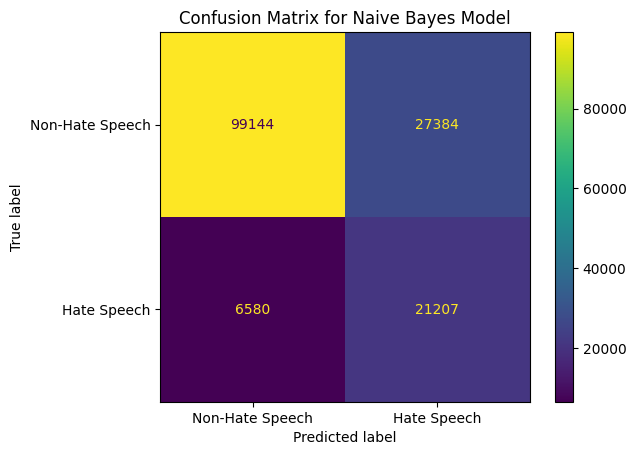

In [3]:
labels = ['Non-Hate Speech', 'Hate Speech']
cm = metrics.confusion_matrix(y_test, predictions)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

print("Naive Bayes Model Evaluation:")
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))

display.plot()
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()